# Estimación de la emisividad del plasma SCR 1#
Miguel Rojas

In [2]:
# The following four lines import libraries that we will be using. 
import pandas as pd              # Pandas interperates the data and allows to maniulate a practical data frame.     
import numpy as np               # Numpy is usefull for scientific computing and linear algebra.
import math as mt
from numpy import exp, log     
import matplotlib.pyplot as plt  # pyplot plots the data
import matplotlib
import matplotlib.cm as cm
from scipy import constants as cnt
from mpl_toolkits import mplot3d

In [3]:
cd "C:\Users\Migue\OneDrive - TEC\Plasmas\Estimación de la emisividad SCR1"

C:\Users\Migue\OneDrive - TEC\Plasmas\Estimación de la emisividad SCR1


In [4]:
data = np.loadtxt('datos45g(2).txt') # skiprows=1)


In [5]:
import scipy.interpolate 
N = 1000 #number of points for plotting/interpolation    
x, y, z = np.genfromtxt(r'datos45g(2).txt', unpack=True)
xll = x.min();  xul = x.max();  yll = y.min();  yul = y.max()
xi = np.linspace(xll, xul, N)
yi = np.linspace(yll, yul, N)
z2 = (5.35E-37)*z**2*np.sqrt(0.01) 
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')


$y= mx+b$

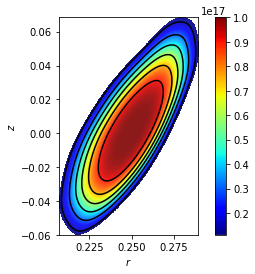

In [6]:
contours = plt.contour(xi, yi, zi, 6, colors='black')
plt.imshow(zi, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.xlabel(r'$r$')
plt.ylabel(r'$z$')

plt.colorbar()
plt.show()

# zi2 = scipy.interpolate.griddata((x, y), z2, (xi[None,:], yi[:,None]), method='cubic')
contours = plt.contour(xi, yi, zi2, 6, colors='black')
plt.imshow(zi2, extent=[xll, xul, yll, yul], origin='lower', cmap=plt.cm.jet, alpha=0.9)
plt.xlabel(r'$r$')
plt.ylabel(r'$z$')

plt.colorbar()
plt.show()

# Estimación de la emisividad del plasma SCR# 
Espectro Bound-bound
Miguel Rojas

Los valores de Aik para la serie de Balmer 
5-2 2.5304e+06
4-2 8.4193e+06
3-2 4.4101e+07

tomados del NIST se debe citar como 
Kramida, A., Ralchenko, Yu., Reader, J., and NIST ASD Team (2018). NIST Atomic Spectra Database (ver. 5.6.1), [Online]. Available: https://physics.nist.gov/asd [2019, August 14]. National Institute of Standards and Technology, Gaithersburg, MD. DOI: https://doi.org/10.18434/T4W30F

referencia para BibTex

@Misc{NIST_ASD,
author = {A.~Kramida and {Yu.~Ralchenko} and
J.~Reader and {and NIST ASD Team}},
HOWPUBLISHED = {{NIST Atomic Spectra Database
(ver. 5.6.1), [Online]. Available:
{\tt{https://physics.nist.gov/asd}} [2019, August 14].
National Institute of Standards and Technology,
Gaithersburg, MD.}},
year = {2018},
}

## Stark Width

Según el artículo "Stark effect of high-n hydrogen-like transitions: quasi-contiguous approximation" es posible estimar el ancho de Stark mediante la siguiente ecuación:  
\begin{equation}
w = f w_{qs} = \frac{R}{R+R_0}w_{qs} \textrm{  con }
R_0 = 0.5
\end{equation}

Donde R puede ser calculado a partir de:

\begin{equation}
R= 2 \overline{\omega}_{1 / 2}^{0}\left(\frac{6 \pi}{5}\right)^{2 / 3} \frac{Z_{p}\left(n^{2}-n^{\prime 2}\right)}{Z} \frac{\hbar N_{p}^{1 / 3}}{m_{e}} \sqrt{\frac{m_{p} m_{r}}{k\left(m_{r} T_{p}+m_{p} T_{r}\right)}} \eta_{\mathrm{qs}}^{\mathrm{pp}} 
\end{equation}

Aclarar que el sub indice $p$ se refiere al perturbador, mientras que el sub indice $r$ se refiere al radiador, en este caso se considera que el radiador es el atomo de hidrógeno, el cual es perturbado por los electrones y iones (tambien de hidrógeno) a su alrededor. Entonces para tener el ancho total se debe realizar para cada "perturbador" o sea, para los electrones y tambien para los inoes.

Se debe combinar cada caso mediante: 
\begin{equation}
w_{\mathrm{tot}}=\left[\sum_{s}\left(f^{(s)} w_{\mathrm{qs}}^{(s)}\right)^{3 / 2}\right]^{2 / 3}
\end{equation}


Los autores consideran $\overline{\omega}_{1 / 2}^{0} = 1.44$ y con: 
\begin{equation}
\eta_{\mathrm{qs}}^{\mathrm{pp}} \approx\left(1+\langle r\rangle / \lambda_{\mathrm{D}}\right) \mathrm{e}^{-\langle r\rangle / \lambda_{\mathrm{D}}}
\end{equation}
\begin{equation}
\left \langle r \right \rangle= \left(\frac{3}{4 \pi N_{p}}\right)^{1 / 3}
\end{equation}

$\lambda_D$ es la longitud de Debyie dada por:
\begin{equation}
\lambda_{\mathrm{D}}=\sqrt{\frac{k T_{p}}{4 \pi N_{p} e^{2} Z_{p}^{2}}}
\end{equation}

en unidades del SI =
\begin{equation}
\lambda_{\mathrm{D}}=\sqrt{\epsilon_0 \frac{k T_{p}}{N_{p} e^{2} Z_{p}^{2}}}
\end{equation}


In [7]:
#estimación valor de R para los electrones unidades CGS: 
def Re(Ne,Tp,Tr,n,n2):
    m_e=9.1095e-28
    m_p=1.6605e-24
    k=1.3803e-16
    e=4.8032e-10
    hbar=6.6262e-27/(2*cnt.pi)
    r= (3/(4*cnt.pi*Ne))**(1/3)
    dby= mt.sqrt(k*Tp/(4*cnt.pi*Ne*e**2))
    eta_ppqs= (1+r/dby)*mt.exp(-r/dby)
    return 2*1.44*((6*cnt.pi/5)**(2/3))*(n**2-n2**2)*hbar*Ne**(1/3)/m_e*mt.sqrt((m_e*m_p)/(k*(m_p*Tp+m_e*Tr)))*eta_ppqs
#R=Re(Ne,Tp,Tr,n,n2)


Por otro lado para calcular el valor de $w_{qs}$:
\begin{equation}
w_{\mathrm{qs}}=2 \overline{\omega}_{1 / 2} \alpha_{n n^{\prime}} F_{0} / \hbar
\end{equation}

con:
\begin{equation}
\overline{\omega}_{1 / 2}=1.44 \eta_{\mathrm{qs}}
\end{equation}

\begin{equation}
\eta_{\mathrm{qs}}=\eta_{\mathrm{qs}}^{\mathrm{pp}} \eta_{\mathrm{qs}}^{\mathrm{rp}}
\end{equation}

mientras que $\eta_{\mathrm{qs}}^{\mathrm{pp}}$ fue calculado previamente, para $\eta_{\mathrm{qs}}^{\mathrm{rp}}$
\begin{equation}
\begin{aligned} \eta_{\mathrm{qs}}^{\mathrm{rp}} & \approx \mathrm{e}^{-r_{m} /\langle r\rangle} \\ r_{m} &=\frac{Z Z_{p} e^{2}}{k T_{p}} \end{aligned}
\end{equation}

luego: 
\begin{equation}
\alpha_{n n^{\prime}}=\frac{3}{2}\left(n^{2}-n^{\prime 2}\right) \frac{e a_{0}}{Z}
\end{equation}

y en unidades esu

\begin{equation}
F_{0}=2 \pi\left(\frac{4}{15}\right)^{2 / 3} Z_{p} e N_{p}^{2 / 3}
\end{equation}

en unidades SI 
\begin{equation}
F_{0}=2.603 \frac{Z_p e}{4 \pi \epsilon_{0}} N_{p}^{2 / 3}
\end{equation}

o lo que es igual a:
\begin{equation}
\frac{F_{0}}{V / m}=3.748 \times 10^{-9} Z_p \left(\frac{N_{p}}{m^{-3}}\right)^{2 / 3}
\end{equation}

In [8]:
def wqs(Ne,Tp,n,n2):
    e=4.8032e-10
    hbar=6.6262e-27/(2*cnt.pi)
    k=1.3803e-16
    hbar=6.6262e-27/(2*cnt.pi)
    rm= (e**2)/(k*Tp)
    r= (3/(4*cnt.pi*Ne))**(1/3)
    dby= mt.sqrt(k*Tp/(4*cnt.pi*Ne*e**2))
    eta_ppqs= (1+r/dby)*mt.exp(-r/dby)
    eta_rpqs=mt.exp(-rm/r)
    a=cnt.physical_constants['Bohr radius']
    nqs= eta_ppqs*eta_rpqs
    F0= 2*cnt.pi*(4/15)**(2/3)*e*Ne**(2/3)
    return 2*1.44*nqs*(3/2)*(n**2-n2**2)*e*a[0]*100*F0/hbar

#w=wqs(Ne,Tp,n,n2)
#c= 29979245800 cm/s 
#f= R/(R+0.5)

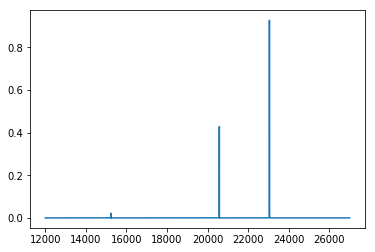

In [9]:
#unidades en cm-1
d=(27000-12000)
phi = np.zeros(d)
for n in range(3, 6):
    Ne=1.02e13
    Tp=0.16*11605
    Tr=0.16*11605
    n2=2 #balmer
    
    p0=109737.3*(1/n2**2-1/n**2)
    R=Re(Ne,Tp,Tr,n,n2)
    w=wqs(Ne,Tp,n,n2)
    f= R/(R+0.5)
    hwhm= f*w/(2*29979245800)
    p = np.arange(12000,27000, 1)
    x=(p0-p)/hwhm
    phin= (1/(1+x**2))
    phi= phin+phi
    phin =0
plt.plot(p,phi)

[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
[  0.95458479   5.00405901  13.73699408  28.31172601  49.42202196
  77.38985127 112.28947737 154.05306094 202.54413523 257.60253487
 319.06905032 386.79735022 460.65857198 540.54201074 626.35392571
 718.01558455 815.46113085]


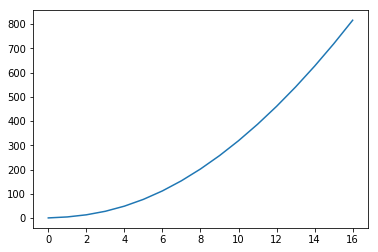

In [10]:
d=(17)
fwhmn = np.zeros(d)
ns=np.zeros(17)
for n in range(3, 20):
    Ne=5e14
    Tp=4*11605
    Tr=4*11605
    n2=2 #balmer
    R=Re(Ne,Tp,Tr,n,n2)
    w=wqs(Ne,Tp,n,n2)
    f= R/(R+0.5)
    fwhm= f*w/(29979245800)
    fwhmn[n-3]=fwhm
    ns[n-3]=n
plt.plot(fwhmn)
print(ns)
print(fwhmn)

# Stark broadening según L.N Kurochka

El articulo se basa en la deducción de la densidad electrónica apartir del ensanchamiento producto del efecto Stark en la serie de Balmer, sin embargo en el proceso obtiende una deducción para la forma de la linea. 

Griem, estableció exitosamente una dependencia de la forma del perfil de Stark a partir de un unico parámetro $\gamma$, que describe la contribución de los electrones al ensanchamiendo. Este parámetro es igual a la mitad del ancho total de los componentes del ensanchamiento de Stark

En terminos adimensionales $\beta$:
\begin{equation}
\gamma=\frac{8.4 n_{e}^{1 / 3}}{10^{6} T_{e}^{1 / 2}} \frac{\frac{1}{3}\left(m^{5}+n^{5}\right)}{m^{2}-{n}^{2}} \log \left(\frac{9 \cdot 10^{12} T_{e}^{2}}{n_{e} n^{4}}\right)
\end{equation}

donde n y m son los numeros cuantos principales del nivel inferior y los niveles superiores. 

La unidad admimensional $\beta$ según 35 es: 
\begin{equation}
\beta=\frac{F}{F_{0}}=\left\{\frac{r_{0}}{r}\right\}^{2}
\end{equation}

adicionalmente el ancho producto de los electrones en unidades de ($2\pi Hz$) está dado por: 
\begin{equation}
{\gamma_{el}}=16 n_{e}\langle v\rangle \rho_{0}^{2}(\langle v\rangle)\left[\ln \frac{\rho_{D}}{\rho_{0}(\langle v\rangle)}+0.33\right]
\end{equation}
donde: 
\begin{equation}
\begin{aligned} \rho_{D}^{2} &=\frac{k T_{e}}{4 \pi e^{2} n_{e}}, \quad\langle v\rangle=\left(\frac{8 k T_{e}}{\pi m_{e}}\right)^{1 / 2} \\ \rho_{0}^{2}(\langle v\rangle) &=\frac{2}{3} \frac{e^{4}}{\hbar^{2}}\left(\frac{\hbar^{2}}{Z_{i} m_{e} e^{2}}\right)^{2} \frac{\Gamma_{n m}}{\langle v\rangle^{2}} \end{aligned}
\end{equation}
\begin{equation}
\Gamma_{n m}=\frac{\sum_{l}\left\{l\left(R_{m}^{n-1}\right)^{2}+(l+1)\left(R_{m}^{n+1}\right)^{2}\right\}\left\{\frac{l}{2 l+1}\left(R_{m l}^{m-l}\right)^{2}+\frac{l+1}{2 l+1}\left(R_{m l}^{m+1}\right)^{2}\right\}}{\sum_{l} l\left(R_{m l}^{n-1}\right)^{2}+(l+1)\left(R_{m l}^{n l+1}\right)^{2}}
\end{equation}
\begin{equation}
R_{m l}^{m l-1}=\frac{3}{2} m \sqrt{m^{2}-l^{2}}, \quad R_{m l}^{m l-1}=\frac{3}{2} m \sqrt{m^{2}-(l+1)^{2}}
\end{equation}
La expresión especifica para la serie de balmer (n=2)  puede ser escrita de la forma: 

Donde para m=3, $d(m)=1$ y conforme $m$ se incrementa, $d(m)$ se aproxima a $2.25$. 
\begin{equation}
\Gamma_{n m}=d(m)\left(m^{4}+n^{4}\right)
\end{equation}
Las transformaciónes de $\gamma_{el}$ a las unidades adimensionales está dado por: 
\begin{equation}
\gamma_{el}=2 B_{m} F_{0 \mathrm{Y}}, \quad B_{m}=\frac{2 \pi c}{\lambda^{2}} k_{m}, \quad F_{0}=2.61 e n_{e}^{2/3}
\end{equation}
\begin{equation}
k_{m}=5.5 \cdot 10^{-5} \frac{(m n)^{4}}{m^{2}-n^{2}}
\end{equation}
De estas ecuaciones es posible deducir que: 
\begin{equation}
\gamma=8.4 \cdot 10^{-6} \frac{n_{e}^{1 / 3} \Gamma_{n m}}{T_{e}^{1 / 2}\left(m^{2}-n^{2}\right)} \log \left(\frac{4 \cdot 10^{13} T_{e}^{2}}{n_{e} \Gamma_{n m}}\right)
\end{equation}
El perfil de Stark se calcula mediante la operación
\begin{equation}
T(\beta, \gamma)=\frac{1}{\pi} \int_{-\infty}^{+\infty} T\left(\beta^{\prime}\right) \frac{\gamma}{\gamma^{2}+\left(\beta-\beta^{\prime}\right)^{2}} d \beta^{\prime}
\end{equation}
Que puede ser aproximada por: 
\begin{equation}
T(\beta, \gamma)=\frac{1}{\pi} \frac{\gamma}{\beta^{2}+\gamma^{2}}
\end{equation}




In [19]:

Ne=5e14
Te=4*11605
m=3
n=2 #balmer
gnm=2.25*(m**4+n**4)# en realidad es valido para m>15
gamma= 8.4e-6*(Ne**(1/3)*gnm)*mt.log(4e13*Te**2/(Ne*gnm))/(Te**(1/2)*(m**2-n**2))
print(gamma)

1.834233666118027


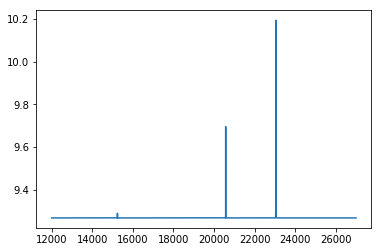

In [33]:
p2 = np.arange(12000,27000, 1)
beta= 1 #falta definir apropiadamente este valor
phin2= 1# (gamma/(cnt.pi*(beta**2+gamma**2)))
phi2= phin2+phi2
phin2 =0
plt.plot(p2,phi2)

C:\Users\Migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\Migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


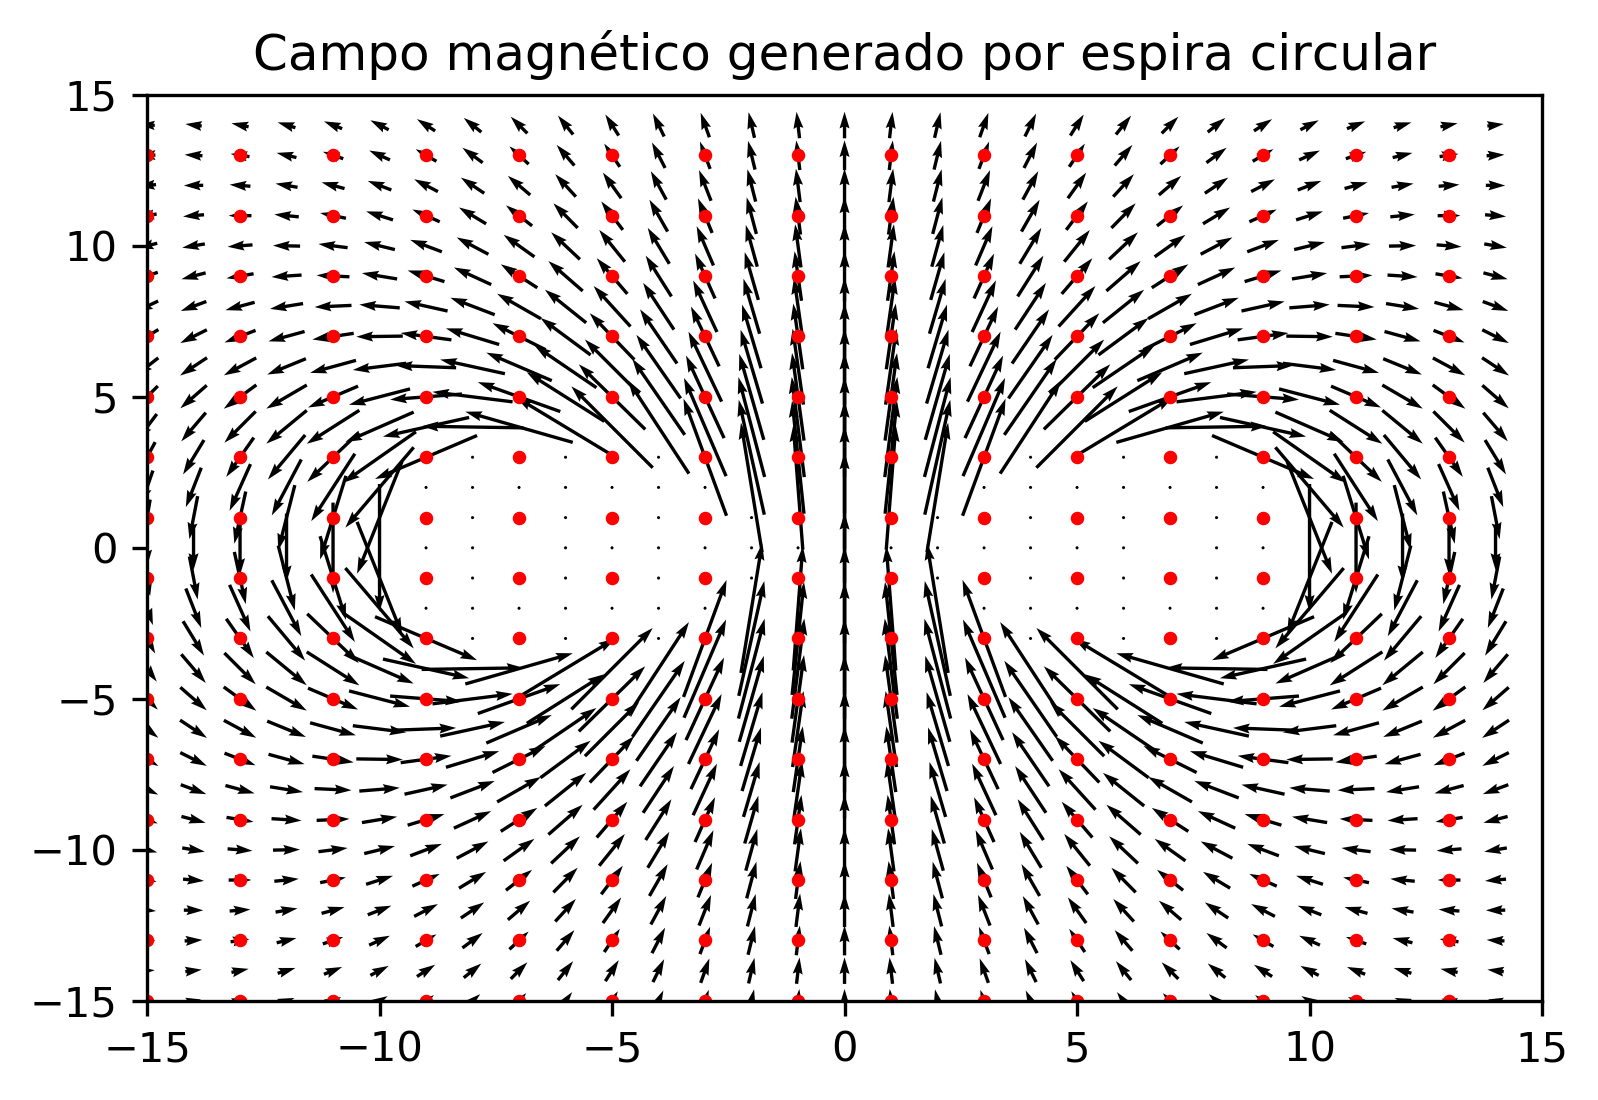

In [635]:
from pylab import *
from numpy import ma

Xmax=15
Ymax=15
delta= 1
X,Y = meshgrid(np.arange(-Xmax, Xmax, delta ),np.arange(-Ymax, Ymax, delta ) )

U = 3*(-(Y/((-7-X)**2+(Y)**2)) +(Y/((7-X)**2+(Y)**2)))
V = 3*(-((-7-X)/((-7-X)**2+(Y)**2)) +((7-X)/((7-X)**2+(Y)**2)))


for x in range(0, len(X)):
    for y in range(0, len(Y)):
        if abs((U[x,y]**2+V[x,y]**2)**(0.5)) > 0.85:
            U[x,y]=0
            V[x,y]=0
                   
figure(dpi=300)
Q= quiver(X,Y,U, V, scale=9, pivot = 'mid')
xmin, xmax, ymin, ymax = axis([-Xmax, Xmax, -Ymax, Ymax])
plt.scatter(X[::2, ::2], Y[::2, ::2], color='r', s=5)
title('Campo magnético generado por espira circular')

savefig('output.jpg')
show()

C:\Users\Migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Migue\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


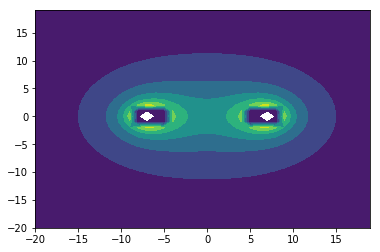

In [631]:
>>> import matplotlib.pyplot as plt
X,Y = meshgrid(np.arange(-20, 20, 1 ), np.arange(-20, 20, 1))
U = -(Y/((-7-X)**2+(Y)**2)) +(Y/((7-X)**2+(Y)**2))
V = -((-7-X)/((-7-X)**2+(Y)**2)) +((7-X)/((7-X)**2+(Y)**2))
for x in range(0, len(X)):
    for y in range(0, len(Y)):
        if abs((U[x,y]**2+V[x,y]**2)**(0.5)) > 0.5:
            U[x,y]=0
            V[x,y]=0
>>> z = (U**2+V**2)**(0.5)
>>> h = plt.contourf(X,Y,z)
>>> plt.show()

In [553]:
U

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [597]:
len(X)

20

In [550]:
U[10]

array([ 0.025112  ,  0.02809701,  0.03145577,  0.0352071 ,  0.03935037,
        0.04385232,  0.04862981,  0.05352941,  0.05830803,  0.06262199,
        0.06603618,  0.06806396,  0.06824067,  0.06621622,  0.06183518,
        0.05517024,  0.04649425,  0.0362069 ,  0.02475138,  0.0125538 ,
        0.        , -0.0125538 , -0.02475138, -0.0362069 , -0.04649425,
       -0.05517024, -0.06183518, -0.06621622, -0.06824067, -0.06806396,
       -0.06603618, -0.06262199, -0.05830803, -0.05352941, -0.04862981,
       -0.04385232, -0.03935037, -0.0352071 , -0.03145577, -0.02809701])